!pip install pmdarima

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
train = pd.read_csv(r"NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv"
                 , index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [3]:
test=pd.read_csv(r"NSE Out of Time Testing Data - 1st Jan 2022 to 4th Feb 2022.csv"
                 , index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500
2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400
2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500
2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500
2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300


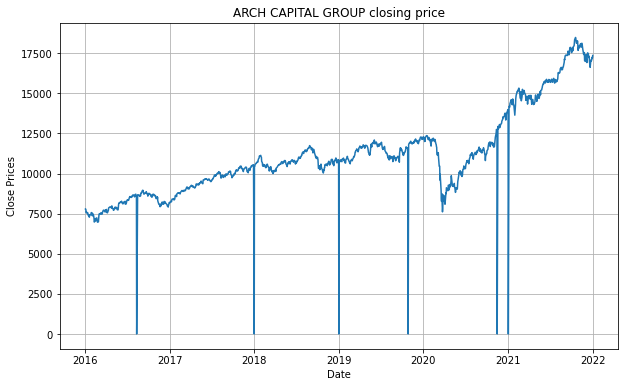

In [4]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(train['Close'])
plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

In [5]:
train.Close.value_counts()

0.000000        6
10948.299805    2
10607.349609    2
9653.500000     2
8615.250000     2
               ..
11476.950195    1
9261.950195     1
8926.900391     1
9794.150391     1
16770.849609    1
Name: Close, Length: 1460, dtype: int64

In [7]:
train['Close']=train['Close'].replace(0,train['Close'].mean())

In [8]:
train['Close'].value_counts()

11134.930215    6
10607.349609    2
8615.250000     2
9173.750000     2
11346.200195    2
               ..
8253.799805     1
11476.950195    1
9261.950195     1
8926.900391     1
16770.849609    1
Name: Close, Length: 1460, dtype: int64

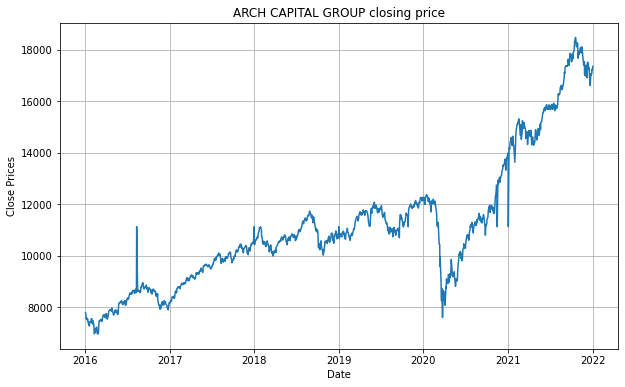

In [9]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(train['Close'])
plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

<AxesSubplot:ylabel='Density'>

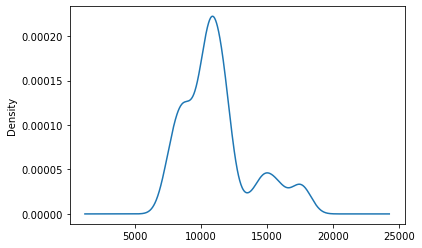

In [10]:
#Distribution of the dataset
df_close =train['Close']
df_close.plot(kind='kde')

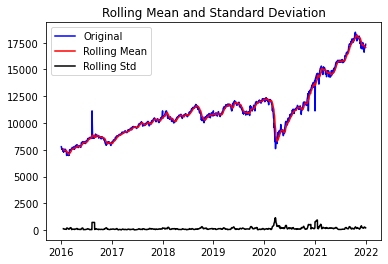

Results of dickey fuller test
Test Statistics                   0.159319
p-value                           0.969885
No. of lags used                  3.000000
Number of observations used    1477.000000
critical value (1%)              -3.434785
critical value (5%)              -2.863499
critical value (10%)             -2.567813
dtype: float64


In [11]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 432x288 with 0 Axes>

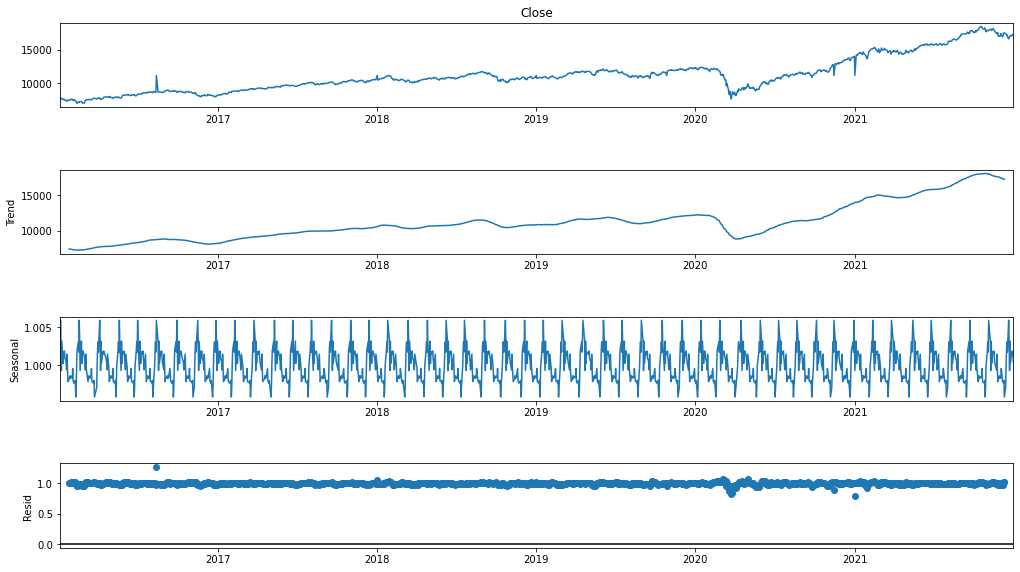

In [12]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


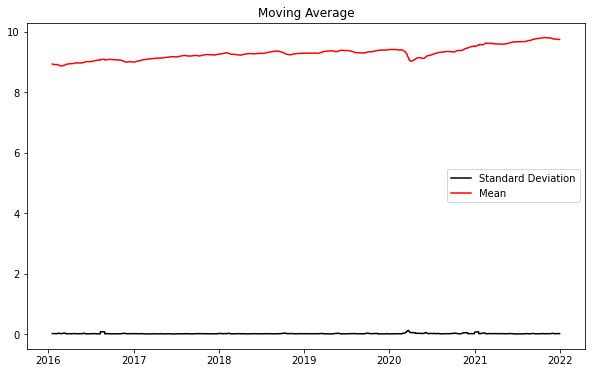

In [13]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [14]:
train_data=df_log

In [15]:
#Distribution of the dataset
df_close1 =test['Close']
df_log1 = np.log(df_close1)

In [16]:
test_data=df_log1

In [17]:
print("Train shape",train_data.shape)
print("Test shape",test_data.shape)

Train shape (1481,)
Test shape (23,)


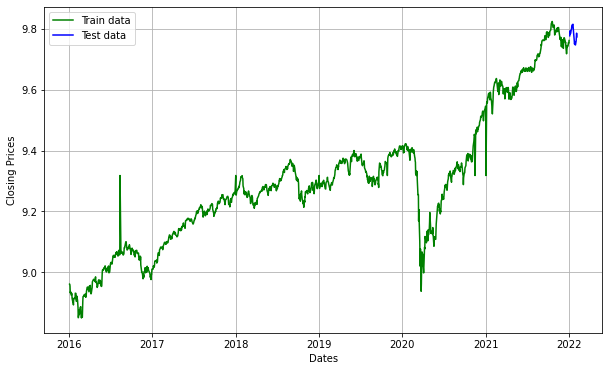

In [18]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7684.984, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7835.335, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7857.844, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7685.650, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7855.430, Time=0.64 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-7855.918, Time=1.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7853.868, Time=2.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-7856.283, Time=0.31 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 5.874 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1481
Model:               SARIMAX(0, 1, 1)   Log Likelihood                3931.922
Date:                Sat, 05 Feb 2022   AIC                          -7857.844
Time:                       

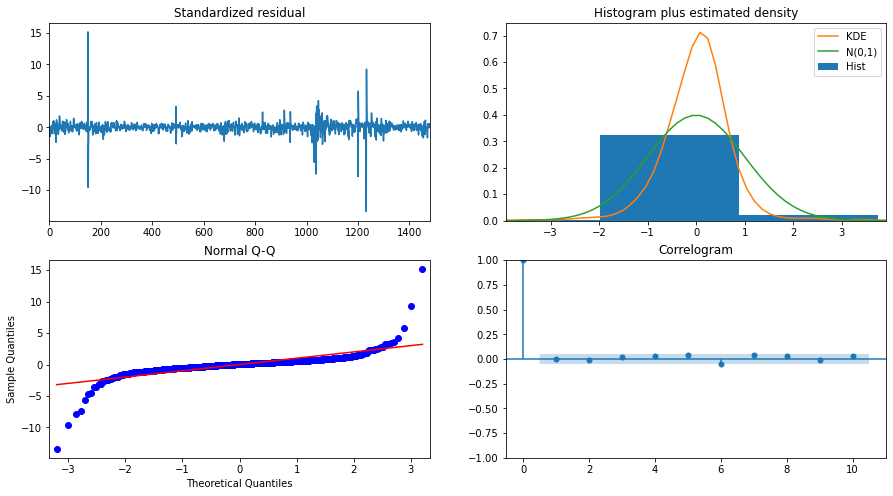

In [19]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [20]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(0,1,1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1480
Model:                 ARIMA(0, 1, 1)   Log Likelihood                3931.934
Method:                       css-mle   S.D. of innovations              0.017
Date:                Sat, 05 Feb 2022   AIC                          -7857.868
Time:                        14:30:31   BIC                          -7841.969
Sample:                             1   HQIC                         -7851.941
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.000      1.890      0.059   -2.01e-05       0.001
ma.L1.D.Close    -0.3520      0.024    -14.777      0.000      -0.399      -0.305
                                    Root

C:\Users\Namratha.Gowda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Namratha.Gowda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [21]:
fc, se, conf = fitted.forecast(23, alpha=0.05)  # 95% conf

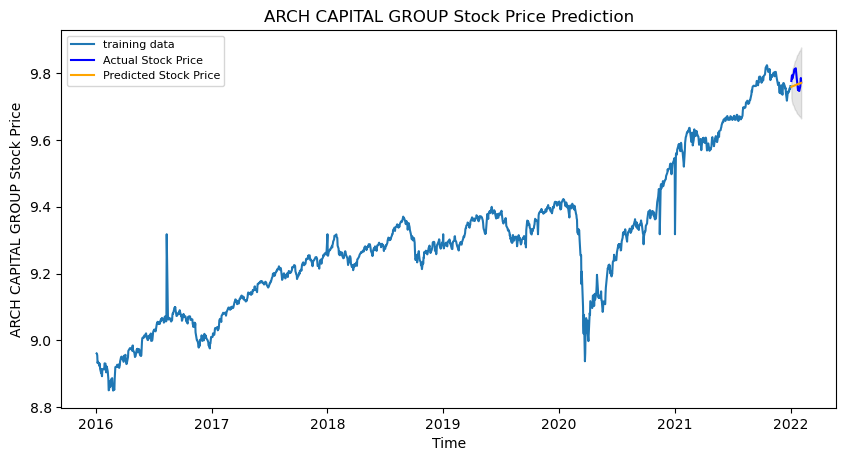

In [22]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [23]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.0008741478401766543
MAE: 0.025857230511899896
RMSE: 0.02956599127674657
MAPE: 0.0026403649356491307
